In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import arff
import pandas as pd
import seaborn as sns
sns.set()
plt.show()

data = arff.loadarff('/Users/phuongqn/Desktop/INF552/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()
df['class'] = df['class'].str.decode('utf-8')

plt.show()

g = sns.pairplot(df, hue="class")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/phuongqn/Desktop/INF552/vertebral_column_data/column_2C_weka.arff'

It took me quite a while to figure out how to make a scatterplot using seaborn package, since I haven't used python or Jupyter Notebook for a while. I'm also not at an advance level. After that I found the code for creating pairgrid scatterplot with some histgrams for repeated pairs. Here, each indepent variables are mapped against each other divided out by class: abnormal or normal. I also cleaned up the dataset, since the class volumn showed b'Abnormal' and b'Normal'. I changed them back to just Normal and Abnormal for later used.

By using a for loop, I run through the columns of the dataframe, minus 1 from the length because I want to leave out the class column.

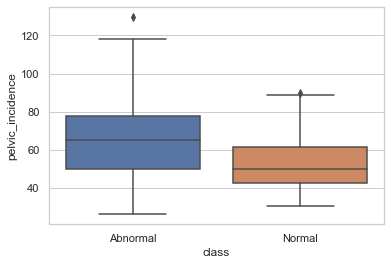

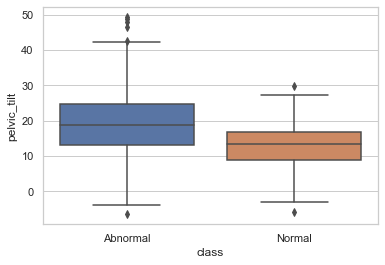

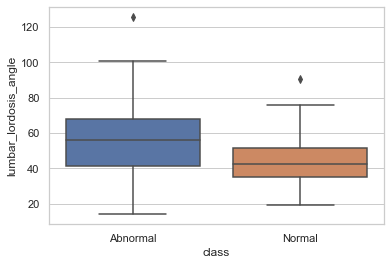

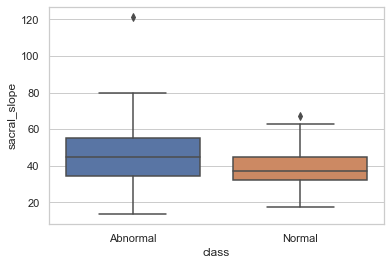

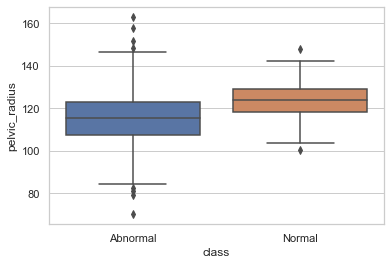

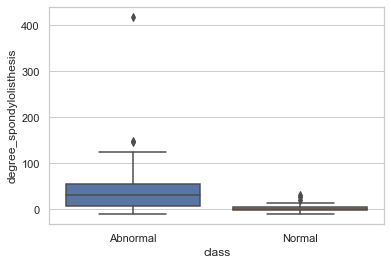

In [3]:
for i in range(len(df.columns)-1):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots()
    sns.boxplot(x=df['class'], y=df.columns[i], data=df)

Here, I assign bin values to normal and abnormal

In [4]:
mapping = {'Abnormal': 1, 'Normal': 0}
df['class'] = df['class'].replace('Abnormal', 1)
df['class'] = df['class'].replace('Normal', 0)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


This is where I slice the datafram into subsets so that I can make the train dataset and the test data set

In [5]:
dataset1=df[df['class'] == 1][:140]
dataset2=df[df['class'] == 0][:70]
train_dataset=pd.concat([dataset1, dataset2])
dataset3=df[df['class']==1][140:]
dataset4=df[df['class'] == 0][70:]
test_dataset=pd.concat([dataset3, dataset4])
test_dataset
train_dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


Creating separate dataset for train and test class because it's the class that we want to predict here. I also drop class column from both train and test datasets

Here I write the first model to train it, using k=5

In [6]:
y_train=train_dataset['class'].values
y_test=test_dataset['class'].values

X_train=train_dataset.drop(columns = ['class'])
X_test=test_dataset.drop(columns = ['class'])

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(knn.predict(X_test)[0:5])
knn.score(X_test,y_test)

[1 1 1 1 1]


0.9

Here I ran a loop using for loop through range of 1 to 208 and append all the results to a new dataframe and use that to plot the train and test error to compare using mathplot

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

train_error=[]
test_error=[]
K=[]
errors = pd.DataFrame(columns=['K Value', 'Train Error Rate', 'Test Error Rate'])

for i in reversed(range(208, -2, -3)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    pred_k = knn.predict(X_train)
    
    train_error.append(np.mean(pred_k != y_train))
    test_error.append(np.mean(pred_i != y_test))
    K.append(i)   

errors['K Value']= K
errors['Test Error Rate']= test_error
errors['Train Error Rate']= train_error
errors

,K Value,Train Error Rate,Test Error Rate
0,1,0.000000,0.13
1,4,0.142857,0.06
2,7,0.142857,0.12
3,10,0.133333,0.10
4,13,0.142857,0.12
5,16,0.157143,0.09
6,19,0.147619,0.11
7,22,0.152381,0.10
8,25,0.138095,0.11
9,28,0.138095,0.10


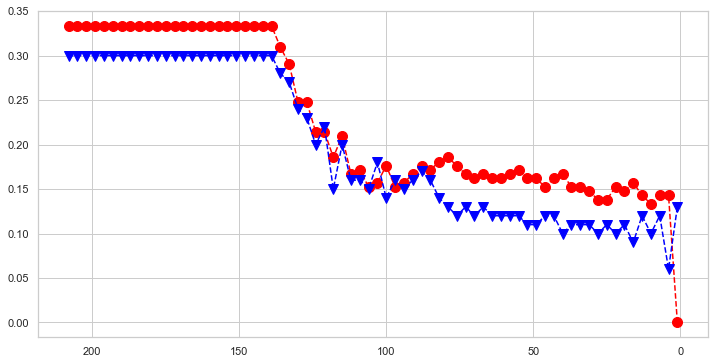

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(errors['K Value'], errors['Train Error Rate'], color='red', linestyle='dashed', marker='o',
         markersize=10)
plt.plot(errors['K Value'], errors['Test Error Rate'], color='blue', linestyle='dashed', marker='v',
         markersize=10)
plt.gca().invert_xaxis()
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Error Rate')

Based on the plot and datafram, we can see that 4 is the best k. Hence, I plugged k into the model to run and get the confusion matrix along with true negative, true postive, precision rate and f1 score.

In [35]:
# Most suitable k seems to be k=4 (based on error dataframe and chart)
# Retrain model using k=4

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp=cmat.ravel()

#print confusion matrix
print('Confusion Matrix:\n', cmat)

print('TN - True Negative: ', tn/(tn+fp))
print('TP - True Positive: ', tp/(tp+fn))
print('Precision: ',tp/(tp+fp))
print('F1 score: ', f1_score(y_test, y_pred))

Confusion Matrix:
 [[25  5]
 [ 1 69]]
TN - True Negative:  0.8333333333333334
TP - True Positive:  0.9857142857142858
Precision:  0.9324324324324325
F1 score:  0.9583333333333333


Here I rerun the model, but using a nested loop with condition to find best k in order to confirm my observation

In [34]:
bestk= None
min_er= float('inf')

for i in reversed(range(208, -2, -3)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    pred_k = knn.predict(X_train)
    
    train_error= np.mean(pred_k != y_train)
    test_error = np.mean(pred_i != y_test)
    
    if min_er>test_error:
        min_er=test_error
        bestk= i
print('The most suitable k is:', bestk, 'with error rate', min_er)
len(train_dataset)

The most suitable k is: 4 with error rate 0.06


210

Next, I create a dataframe after looping through different size of training set with the increment of 10. I also set the clause for how the set should be sliced by class. The output is a datafram with optimal K for each size N and the test error rate that comes with it.

In [11]:
K= []
n= []
test_errors=[]
curve=pd.DataFrame(columns=['K', 'N', 'Test Errors'])

for N in range(10, (len(train_dataset) + 1), 10):
    df_train=pd.concat([train_dataset[train_dataset['class']==0][:N//3],train_dataset[train_dataset['class']==1][:N-N//3]])
    y_train=df_train['class'].values
    X_train=df_train.drop(columns = ['class'])
    
    min_test_error = float('inf')
    best_k = None
    
    for k in range(1,N,5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred_k = knn.predict(X_test)
        test_error = (np.mean(pred_k != y_test))
        
        if test_error < min_test_error:
            min_test_error = test_error
            best_k = k
            
    test_errors.append(min_test_error)
    K.append(best_k)
    n.append(N)
    
curve['K']= K
curve['N']= n
curve['Test Errors']= test_errors
curve

,K,N,Test Errors
0,1,10,0.25
1,6,20,0.20
2,1,30,0.22
3,11,40,0.25
4,26,50,0.30
5,21,60,0.29
6,26,70,0.29
7,31,80,0.29
8,41,90,0.29
9,6,100,0.26


Using this data frame, I'm able to compare this against the graph I create for the learning curve.

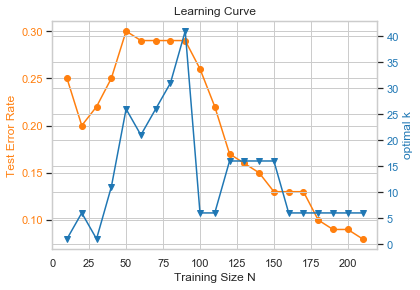

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Training Size N')
ax1.set_ylabel('Test Error Rate', color=color)
ax1.plot(n, test_errors, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('optimal k', color=color)  
ax2.plot(n, K, color=color, marker='v')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title("Learning Curve")
plt.show()

To start, I reload the dataset forr testing and training. Instead of using the default model, I now add the metric and p to indicate which metric I want to run the test on.

In [13]:
from sklearn.neighbors import DistanceMetric 
new_test_errors=[]
best_Ks=[]

y_train=train_dataset['class'].values
y_test=test_dataset['class'].values
X_train=train_dataset.drop(columns = ['class'])
X_test=test_dataset.drop(columns = ['class'])

min_man_error= float('inf')
best_man_k= None

for k in range(1,201,5):
    
    manhattan_error= KNeighborsClassifier(n_neighbors = k, p = 1, metric='manhattan')
    manhattan_error.fit(X_train, y_train)
    pred_man_test = manhattan_error.predict(X_test)
    new_man_error = (np.mean(pred_man_test != y_test))
    
    if new_man_error < min_man_error:
        min_man_error = new_man_error
        best_man_k=k
best_Ks.append(best_man_k)
new_test_errors.append(min_man_error)

print(min_man_error, best_man_k)
print(best_Ks, new_test_errors)

0.11 1
[1] [0.11]


From my understanding of the prompt, it seems like I need to plug in the optimal k found by using Manhattan metric to the Minkowski metric to find the best logp, then use that logp to find the optimal k for Minkowski metric.

In [14]:
logp_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# logp_list=np.arange(0.1, 1.1, 0.1)
best_logp = None
min_log_error = float('inf')

for logp in logp_list:
    p = 10**logp
    mk_error= KNeighborsClassifier(n_neighbors = best_man_k, p = p, metric='minkowski')
    mk_error.fit(X_train, y_train)
    pred_log_test = mk_error.predict(X_test)
    new_log_error = (np.mean(pred_log_test != y_test))
    #print(logp, new_error)
    if new_log_error < min_log_error:
        min_log_error = new_log_error
        best_logp = logp      
print("Best log10(p) is: " ,best_logp, "with error rate at: ", min_log_error)


Best log10(p) is:  0.7 with error rate at:  0.11


In [15]:
min_min_error= float('inf')
best_min_k= None

for k in range(1,201,5):

    new_mk_error= KNeighborsClassifier(n_neighbors = k, p = 10**best_logp, metric='minkowski')
    new_mk_error.fit(X_train, y_train)
    pred_min_test = new_mk_error.predict(X_test)
    new_min_error = (np.mean(pred_min_test != y_test))
    
    if new_min_error < min_min_error:
        min_min_error = new_min_error
        best_min_k=k
        
best_Ks.append(best_min_k)
new_test_errors.append(min_min_error)

print(min_min_error, best_min_k)


0.07 6


In [16]:
min_che_error= float('inf')
best_che_k= None

for k in range(1,201,5):

    che_error= KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    che_error.fit(X_train, y_train)
    pred_che_test = che_error.predict(X_test)
    new_che_error = (np.mean(pred_che_test != y_test))
    
    if new_che_error < min_che_error:
        min_che_error = new_che_error
        best_che_k=k
        
best_Ks.append(best_che_k)
new_test_errors.append(min_che_error)

print(min_che_error, best_che_k)
print(best_Ks)
print(new_test_errors)

0.08 16
[1, 6, 16]
[0.11, 0.07, 0.08]


In [17]:
min_ma_error= float('inf')
best_ma_k= None
pseudo_inverse = np.linalg.pinv(X_train)
for k in range(1,201,5):

    ma_error= KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'V': np.cov(pseudo_inverse)})
    ma_error.fit(X_train, y_train)
    pred_ma_test = ma_error.predict(X_test)
    new_ma_error = (np.mean(pred_ma_test != y_test))
    
    if new_ma_error < min_ma_error :
        min_ma_error = new_ma_error
        best_ma_k=k
        
best_Ks.append(best_ma_k)
new_test_errors.append(min_ma_error)

print(min_ma_error, best_ma_k)
print(best_Ks)
print(new_test_errors)

distance_metrics = ['manhattan', 'minkowski', 'chebyshev', 'mahalanobis']
d= pd.DataFrame({'Distance Metric' : distance_metrics,'Optimal K' : best_Ks, 'Best Test Error': new_test_errors})
d


0.09 6
[1, 6, 16, 6]
[0.11, 0.07, 0.08, 0.09]


,Distance Metric,Optimal K,Best Test Error
0,manhattan,1,0.11
1,minkowski,6,0.07
2,chebyshev,16,0.08
3,mahalanobis,6,0.09


In [19]:
weighted_dist_metrics = ['euclidean', 'manhattan', 'chebyshev']
weighted_error = []
weighted_k = []

In [20]:
for dist_metric in weighted_dist_metrics:
    weighted_best_k = None
    weighted_min_error = float('inf')
    
    for k in range(1, 201,5):
        weighted_knn = KNeighborsClassifier(n_neighbors = k, metric= dist_metric, weights='distance')
        weighted_knn.fit(X_train, y_train)
        pred_weighted_test = weighted_knn.predict(X_test)
        weighted_test_error = (np.mean(pred_weighted_test != y_test))

        if weighted_min_error > weighted_test_error:
            weighted_min_error = weighted_test_error
            weighted_best_k = k
    weighted_k.append(weighted_best_k)
    weighted_error.append(weighted_min_error)
print(weighted_error, weighted_k)
        
weighted_d = pd.DataFrame({'Distance Metric' : weighted_dist_metrics,'Best K' : weighted_k, 'Weighted Test Error': weighted_error})
weighted_d

[0.1, 0.1, 0.11] [6, 26, 16]


,Distance Metric,Best K,Weighted Test Error
0,euclidean,6,0.10
1,manhattan,26,0.10
2,chebyshev,16,0.11


The smallest, lowest error achieved through this is 0 when k=1 for training dataset. In general, the smallest so far is k=4 and error rate is 0.06.

In [36]:
whos

Variable                Type                    Data/Info
---------------------------------------------------------
DistanceMetric          type                    <class 'sklearn.neighbors<...>_metrics.DistanceMetric'>
K                       list                    n=21
KNeighborsClassifier    ABCMeta                 <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
N                       int                     210
X_test                  DataFrame                    pelvic_incidence  pe<...>n\n[100 rows x 6 columns]
X_train                 DataFrame                    pelvic_incidence  pe<...>n\n[210 rows x 6 columns]
accuracy_score          function                <function accuracy_score at 0x1a1b3786a8>
arff                    module                  <module 'scipy.io.arff' f<...>ipy/io/arff/__init__.py'>
ax                      AxesSubplot             AxesSubplot(0.125,0.125;0.775x0.755)
ax1                     AxesSubplot             AxesSubplot(0.134167,0.161319;0.7526